#  La subset selection

## 1-Chargement des données

### a) Supprimez les données manquantes de votre dataset à l’aide de la fonction na.omit().


In [1]:
library(ISLR)
library(leaps)

hitters_df <- na.omit(ISLR::Hitters) # a) On enlève les données manquantes.

### b) Donnez deux raisons majeures pour lesquelles on veut réduire le nombre de variables.

- On veut modéliser le plus simplement possible le salaire en fonction d'autres variables, il faut donc qu'il y en ait le moins possible.
- On veut éviter l'overfitting.

### c) Construisez un échantillon test composé de 180 individus sur 263 à l’aide de la fonction sample()


In [2]:
hitters_names <- row.names(hitters_df)

sampled_hitters_names <- sample(x = hitters_names,
                          size = 180)
sampled_hitters_df <- subset(hitters_df,
                             hitters_names%in%sampled_hitters_names)
not_sampled_hitters_df <- subset(hitters_df,
                                 !hitters_names%in%sampled_hitters_names)

## 2-La subset selection


In [3]:
best_models19_forward <- regsubsets(Salary~.,
                                    sampled_hitters_df,
                                    nvmax =19,
                                    method = "forward")

coef(best_models19_forward, 5)

summary(best_models19_forward)$rss

mse <- rep(NA, 19)
test <- model.matrix(Salary~., data = not_sampled_hitters_df)

for (i in 1:19) {
  coefi <- coef(best_models19_forward, id = i)
  pred <- test [, names(coefi)]%*%coefi
  
  mse[i] <- mean((not_sampled_hitters_df$Salary - pred)^2)
}

(Intercept)       AtBat        Hits       HmRun       CRuns     PutOuts 
 70.9756518  -1.6269759   7.0855019   5.8468146   0.4986604   0.3189315

[1] 23798760 20481574 19296434 18720751 18417208 18186519 17922264 17743855
 [9] 17439906 17316587 17116058 16942808 16810227 16777945 16754607 16740978
[17] 16730113 16728821 16726873

### a) Dans le modèle 5, quelle variable a le coefficient le plus élevé ? Le plus faible ?

Dans le modèle 5, en valeur absolue, `DivisionW` a le coefficient le plus élevé et `PutOuts` le plus faible.

### b) Interprétez le modèle 5.

Non.

### c) Définir le R.M.S.E. Quelle est la différence entre le R.M.S.E et le M.S.E.

- RMSE: Root Mean Square Error
- MSE: Mean Square Error

RMSE = sqrt(MSE)

### d) Affichez les RMSE des 19 modèles sur le training et sur le test set.


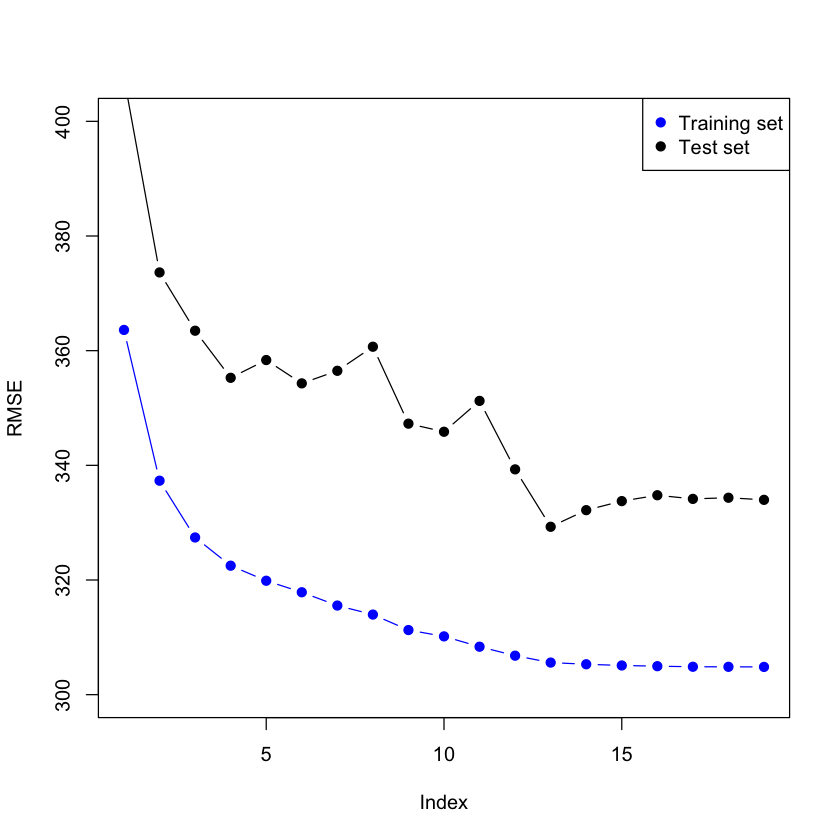

In [4]:
plot(sqrt(mse),
     ylab="RMSE",
     pch=19,
     ylim=c(300, 400),
     type="b")

points(sqrt(best_models19_forward$rss[-1]/180),
       col='blue',
       pch=19,
       type='b')

legend('topright',
       legend=c('Training set','Test set'),
       col=c('blue','black'),
       pch=19)

## 3-Forward stepwise


In [18]:
set.seed(11)

predictFUN <- function(object, newdata, id, ...) {
    form <- as.formula(object$call[[2]])
    mat <- model.matrix(form, newdata)
    coefi <- coef(object, id=id)
    mat[, names(coefi)]%*%coefi
}

set.seed(11)
folds=sample(rep(1:10,length=nrow(Hitters)))
RSS_training=matrix(NA,10,19)
for(k in 1:10){
  models19_training_cv=regsubsets(Salary~.,data=Hitters[folds!=k,],
                                  nvmax=19,method='forward')
  for(i in 1:19){
    pred=predictFUN(models19_training_cv,Hitters[folds==k,],id=i)
    RSS_training[k,i]=mean( (Hitters$Salary[folds==k]-pred)^2)
  }
}

Warning message in Hitters$Salary[folds == k] - pred:
“longer object length is not a multiple of shorter object length”

ERROR: Error in mean((Hitters$Salary[folds == k] - pred)^2): dims [product 29] do not match the length of object [33]
